Manual Basis Matrix Shape: (24, 11)
Knot Vector: [  0.78307296   0.78307296   0.78307296   0.78307296  18.27033113
  35.75758931  53.24484749  70.73210566  88.21936384 105.70662201
 123.19388019 140.68113836 140.68113836 140.68113836 140.68113836]


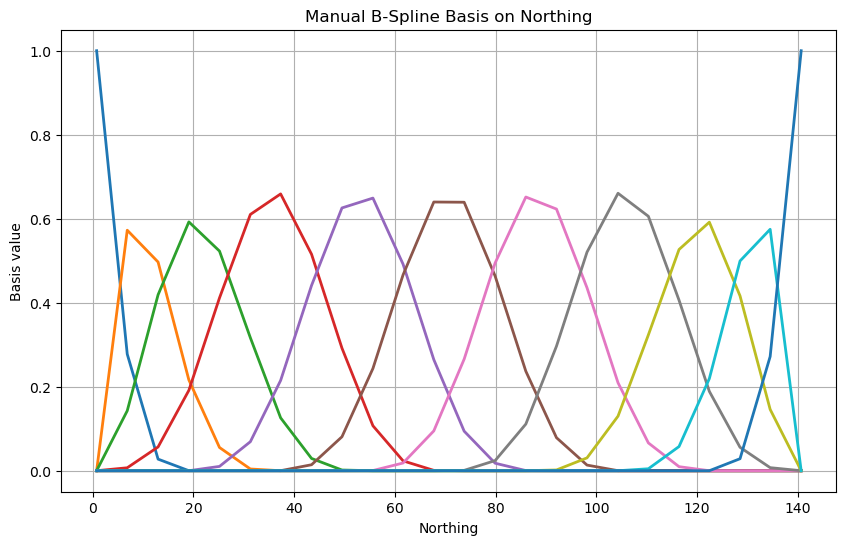

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline

# ------------------------------------------------------------
# Load your data
# ------------------------------------------------------------
df = pd.read_csv("Example1SmoothHarvestStrip214.csv")

# Extract the variable for the spline
x = df["Northing"].values.astype(float)

# ------------------------------------------------------------
# Manual knot construction (open-uniform B-spline)
# ------------------------------------------------------------
degree = 3                # cubic spline
n_knots = 10              # total knot count

xmin = x.min()
xmax = x.max()

n_internal = n_knots - degree + 2
internal_knots = np.linspace(xmin, xmax, n_internal)

# Open-uniform knots: repeat boundaries degree times
knots = np.concatenate((
    [xmin] * degree,
    internal_knots,
    [xmax] * degree
))

# ------------------------------------------------------------
# Number of basis functions
# ------------------------------------------------------------
n_basis = len(knots) - degree - 1

# Allocate matrix
X = np.zeros((len(x), n_basis))

# ------------------------------------------------------------
# Build each basis function manually
# ------------------------------------------------------------
for j in range(n_basis):
    # coefficient vector selecting basis j
    c = np.zeros(n_basis)
    c[j] = 1.0

    # construct B-spline basis function j
    spline_j = BSpline(knots, c, degree, extrapolate=False)

    # evaluate on all x
    X[:, j] = spline_j(x)

# ------------------------------------------------------------
# Output results
# ------------------------------------------------------------
print("Manual Basis Matrix Shape:", X.shape)
print("Knot Vector:", knots)

# ------------------------------------------------------------
# Plot basis
# ------------------------------------------------------------
plt.figure(figsize=(10, 6))
for j in range(n_basis):
    plt.plot(x, X[:, j], linewidth=2)
plt.title("Manual B-Spline Basis on Northing")
plt.xlabel("Northing")
plt.ylabel("Basis value")
plt.grid(True)
plt.show()
